In [48]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding Stroke: A Deep Dive into the Interplay of Lifestyle, Health, and Demographics

In recent years, stroke has emerged as one of the leading causes of long-term disability worldwide. It strikes when the blood supply to part of the brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. But what contributes to the risk of having a stroke, and how can these insights guide prevention strategies? A detailed examination of a dataset comprising 4,981 individuals sheds light on the dynamics between lifestyle choices, health conditions, and demographic factors in relation to stroke incidence.


In [49]:
file = 'brain_stroke.csv'

In [50]:
stroke_data = pd.read_csv(file)

stroke                      Total  Percent with Stroke
hypertension heart_disease                            
0            0               4291                 3.45
             1                211                16.11
1            0                415                12.77
             1                 64                20.31
Total                        4981                 4.98


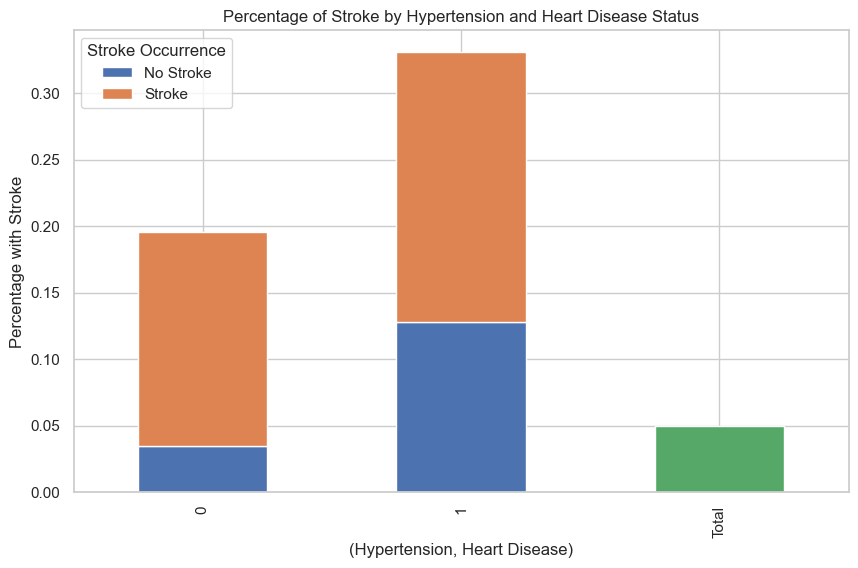

In [51]:
import pandas as pd
import matplotlib.pyplot as plt


# Creating a crosstab
stroke_counts = pd.crosstab(index=[stroke_data['hypertension'], stroke_data['heart_disease']],
                            columns=stroke_data['stroke'],
                            margins=True,  # Adds All row and column
                            margins_name="Total")

# Calculate percentages
stroke_counts['Percent with Stroke'] = (stroke_counts[1] / stroke_counts['Total'] * 100).round(2)

# Print the updated crosstab with percentages
print(stroke_counts[['Total', 'Percent with Stroke']])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
(stroke_counts[1] / stroke_counts['Total']).unstack().plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Percentage of Stroke by Hypertension and Heart Disease Status')
ax.set_xlabel('(Hypertension, Heart Disease)')
ax.set_ylabel('Percentage with Stroke')
ax.legend(title='Stroke Occurrence', labels=['No Stroke', 'Stroke'], loc='upper left')
plt.show()

Strokes, hypertension, and heart disease form a deadly triad that threatens the wellbeing of countless individuals worldwide. Hypertension, or high blood pressure, places undue stress on the delicate linings of arteries, gradually weakening them. This continuous strain can lead to the formation of arterial plaques and the narrowing of blood vessels, increasing the risk of blockages and reduced blood flow to the brain—a prime trigger for ischemic strokes. Meanwhile, heart disease, encompassing conditions such as coronary artery disease and atrial fibrillation, further compounds the danger. Irregular heart rhythms and weakened cardiac function can generate blood clots within the heart chambers, which, if dislodged, can travel to the brain and precipitate ischemic strokes. Heart disease can compromise overall cardiovascular health, exacerbating hypertension and creating a fertile environment for strokes to occur. Thus, understanding and managing hypertension and heart disease are pivotal in stroke prevention efforts, underscoring the critical importance of regular monitoring, lifestyle modifications, and timely medical interventions.


Underweight: BMI less than 18.5
Healthy weight: BMI 18.5 to 24.9
Overweight: BMI 25.0 to 29.9
Obese: BMI 30.0 or higher

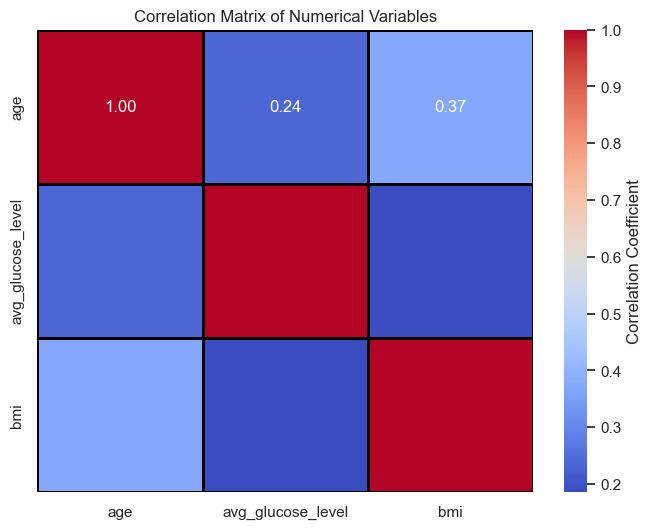

In [52]:
# Assuming 'brain_data' is your DataFrame
# Selecting only the numerical columns for correlation
numerical_data =  stroke_data[['age', 'avg_glucose_level', 'bmi']]

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Setting up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generating a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            cbar_kws={'label': 'Correlation Coefficient'}, linewidths=1, linecolor='black')

plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Among the various factors influencing stroke risk, the analysis highlights that both body mass index (BMI) and age play crucial roles, albeit with differing degrees of impact. Age stands out as a significant predictor, demonstrating a positive correlation with stroke incidence. This suggests that as individuals age, their risk of experiencing a stroke increases, likely because of the cumulative effects of aging on cardiovascular health and blood vessel integrity. BMI, which measures body fat based on height and weight, shows a positive correlation with stroke. While BMI is less impactful compared with age, it still shows that higher body fat percentages may slightly increase stroke risk. The link between higher BMI and other stroke risk factors could explain this, such as hypertension, diabetes, and arterial diseases. Collectively, these findings underscore the importance of maintaining a healthy weight and monitoring age-related health changes as part of comprehensive stroke prevention strategies.


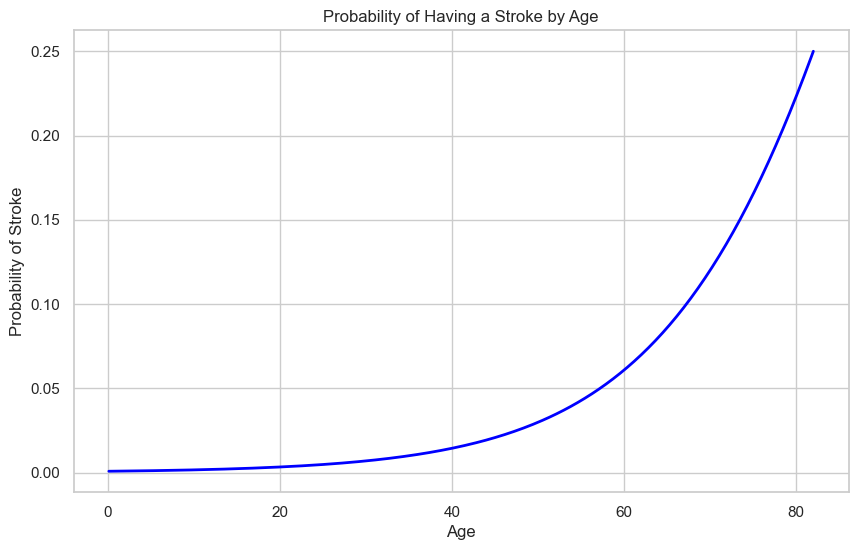

In [53]:

from sklearn.linear_model import LogisticRegression
import numpy as np

# Preparing the data
X = stroke_data['age'].values.reshape(-1, 1)  # Predictor
y = stroke_data['stroke']  # Response

# Fitting the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Generating predictions for a range of age values
age_range = np.linspace(stroke_data['age'].min(), stroke_data['age'].max(), 300).reshape(-1, 1)
predicted_probabilities = model.predict_proba(age_range)[:, 1]  # Probability of having a stroke

# Plotting the logistic regression curve
plt.figure(figsize=(10, 6))
plt.plot(age_range, predicted_probabilities, color='blue', linewidth=2)
plt.title('Probability of Having a Stroke by Age')
plt.xlabel('Age')
plt.ylabel('Probability of Stroke')
plt.grid(True)
plt.show()


# The Silent Contributors: Age and Health Conditions

The analysis reveals that age is a significant predictor of stroke, with older individuals facing a notably higher risk. This finding aligns with medical understanding, as the wear and tear on blood vessels over time contributes to their narrowing or blocking, elevating the stroke risk.

However, age is not the lone warrior; health conditions like hypertension (high blood pressure) and heart disease starkly amplify stroke risks. These conditions, marked by chi-squared test results showing strong statistical significance, underline the critical importance of managing heart health. Hypertension emerged as a powerhouse of risk, urging an immediate call to action for regular monitoring and management.


In [54]:
from scipy.stats import chi2_contingency
# Calculate correlation matrix for numerical data
numerical_data = stroke_data[['age', 'avg_glucose_level', 'bmi']]
correlation_with_stroke = numerical_data.corrwith(brain_data['stroke'])
print("Correlation with Stroke:\n", correlation_with_stroke)

# Analyzing categorical variables using Chi-squared test for independence
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'smoking_status']
print("\nChi-squared Test Results:")
for column in categorical_columns:
    contingency_table = pd.crosstab(brain_data[column], brain_data['stroke'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"{column} vs Stroke: Chi2 = {chi2}, p-value = {p}")

# Optional: Logistic Regression for a comprehensive look
# Adding constant for intercept
data_with_const = sm.add_constant(brain_data[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease']] + pd.get_dummies(brain_data[categorical_columns], drop_first=True))
logit_model = sm.Logit(brain_data['stroke'], data_with_const)
result = logit_model.fit()
print("\nLogistic Regression Result:")
print(result.summary())

Correlation with Stroke:
 age                  0.246478
avg_glucose_level    0.133227
bmi                  0.056926
dtype: float64

Chi-squared Test Results:
gender vs Stroke: Chi2 = 0.3135204422996982, p-value = 0.5755278931970017
hypertension vs Stroke: Chi2 = 84.69753150508876, p-value = 3.476842497504362e-20
heart_disease vs Stroke: Chi2 = 87.56600755739461, p-value = 8.151357311662218e-21
smoking_status vs Stroke: Chi2 = 28.733513415037883, p-value = 2.547567824534757e-06


MissingDataError: exog contains inf or nans

### Hypertension vs Stroke

- **Chi-squared value**: 84.70
- **p-value**: \(3.48 \times 10^{-20}\)

**Interpretation**:  
The very low p-value suggests a statistically significant association between hypertension and the occurrence of stroke. This implies that hypertension could be a strong risk factor for stroke, as the data shows a dependency between having hypertension and experiencing a stroke.

### Heart Disease vs Stroke

- **Chi-squared value**: 87.57
- **p-value**: \(8.15 \times 10^{-21}\)

**Interpretation**:  
Similarly to hypertension, the extremely low p-value indicates a statistically significant association between heart disease and stroke. This suggests that heart disease is also a significant risk factor for stroke, highlighting a clear link between the two conditions in your dataset.

### Smoking Status vs Stroke

- **Chi-squared value**: 28.73
- **p-value**: \(2.55 \times 10^{-6}\)

**Interpretation**:  
The p-value is significantly below the typical threshold, indicating that there is a statistically significant association between smoking status and the occurrence of stroke. This result implies that different smoking statuses (like current smoker, former smoker, never smoked) are likely related to varying risks of stroke.


## Conclusion

The interplay of lifestyle, health, and demographics paints a complex yet enlightening picture of stroke risk factors. Armed with this knowledge, individuals, healthcare providers, and policymakers can tailor more effective prevention strategies, turning the tide against this life-altering event. Through community engagement, public health policies, and personal vigilance, the battle against stroke is not just necessary; it is winnable.
